Complie the mod files:

In [1]:
!nrnivmodl ghchan.mod kca2.mod kdrRL.mod L_Ca.mod mAHP.mod na3rp.mod naps.mod

/home/user/anaconda3/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/user/Desktop/Mouse-motor-neuron-model-main/MouseNEURON
Mod files: "./ghchan.mod" "./kca2.mod" "./kdrRL.mod" "./L_Ca.mod" "./mAHP.mod" "./na3rp.mod" "./naps.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


Launch NEURON simulation environment:

In [4]:
from neuron import h,gui
import numpy as np
import matplotlib.pyplot as plt

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


Load the .hoc files with mouse morphologies:

In [7]:
h.load_file("nrngui.hoc")
h.load_file("1_mosinit_mouse.hoc")

	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 


1.0

Select sections for the extracellular mechanism to include the soma and dendritic tree, but not the axon:

In [9]:
sections = h.allsec()
EFsections = []
for sec in sections:
    if sec == h.AH:
        break
    else:
        EFsections.append(sec)

Here you can change the dirrection of the field - sec.y3d for the y axis and sec.x3d for the x axis:

In [11]:
x = []
for sec in EFsections:
    sec_x_values = [sec.y3d(i) for i in range(sec.n3d())]
    sec_x_center = sum(sec_x_values) / len(sec_x_values)
    x.append(sec_x_center)

In [12]:
print(min(x), max(x))
print(max(x)-min(x))

-184.83500003814697 398.7971452985491
583.6321453366961


Here you can set the field strength (it is in mV/um)

Add the extracellular mechanism with the set field strength and direction:

In [20]:
field_strength = 0.0007

i=0
for sec in EFsections:
    sec.e_extracellular = field_strength * x[i] 
    i = i+1


-1.2938450002670288 2.7915800170898435
4.085425017356872


In [21]:
### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance


steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin1 = delta_v / iclamp.amp  # In MΩ
gin1 = 1 / rin1  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin2 = delta_v / iclamp.amp  # In MΩ
gin2 = 1 / rin2  # µS

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance
steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin3 = delta_v / iclamp.amp  # In MΩ
gin3 = 1 / rin3  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin4 = delta_v / iclamp.amp  # In MΩ
gin4 = 1 / rin4  # µS

rin = (rin1 - rin2 +rin3 -rin4)/4
gin = (gin1- gin2 +gin3 -gin4)/4

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

print(f"Input Resistance final: {rin:.2f} MΩ")
print(f"Input Conductance final: {gin:.5f} µS")

Input Resistance final: 19.39 MΩ
Input Conductance final: 0.05286 µS


Rheobase is approximately 1.80 nA


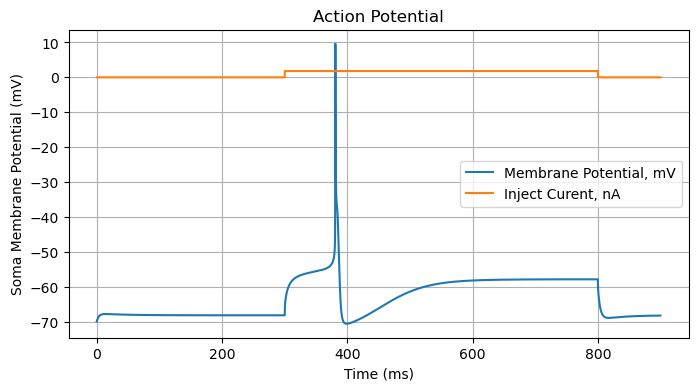

1.0

In [22]:
# Start with a small current and gradually increase it
current_amplitudes = np.arange(1.78, 10.0,0.01)
rheobase = None

for amp in current_amplitudes:
    iclamp = h.IClamp(h.soma(0.5))
    iclamp.delay = 300  # Delay in ms before the stimulus starts
    iclamp.dur = 500   # Duration of the stimulus in ms (long enough to test rheobase)
    iclamp.amp = amp

    # Prepare to record time and voltage
    t_vec = h.Vector().record(h._ref_t)
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)
    i_vec = h.Vector().record(iclamp._ref_i)

    h.finitialize(-70)
    while h.t < 900:
        h.fadvance()

        # Convert recorded vectors to NumPy arrays
    v_d= np.array(v_vec)
    t_d= np.array(t_vec)
    i_d= np.array(i_vec)
    if np.max(v_d) > -10:
        rheobase = amp
        break

if rheobase is not None:
    print(f"Rheobase is approximately {rheobase:.2f} nA")
else:
    print("No spikes were elicited with the tested current range.")

plt.figure(figsize=(8, 4))
plt.plot(t_d, v_d, label="Membrane Potential, mV")
plt.plot(t_d, i_d, label="Inject Curent, nA")
plt.xlabel('Time (ms)')
plt.ylabel('Soma Membrane Potential (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

Resting membrane potential: -68.12 mV
Peak of the action potential: 14.94 mV
Action potential height: 83.06 mV
Latency to peak: 7.00 ms


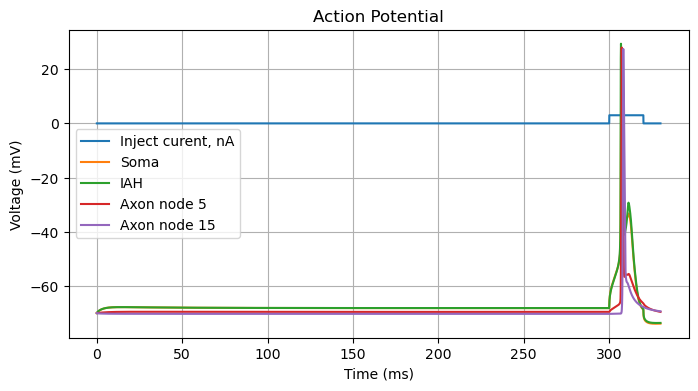

In [23]:
IC = h.IClamp(h.soma(0.5))
IC.delay = 300
IC.dur = 20
IC.amp = 3

# Prepare to record time and voltage
t_vec = h.Vector().record(h._ref_t)
v_soma = h.Vector().record(h.soma(0.5)._ref_v)
i_soma = h.Vector().record(IC._ref_i)
v_ah = h.Vector().record(h.IS(0.5)._ref_v)
v_ax5 = h.Vector().record(h.node[5](0.5)._ref_v)
v_ax15 = h.Vector().record(h.node[15](0.5)._ref_v)
h.finitialize(-70)
# Run the simulation
while h.t < 330:
    h.fadvance()

t = np.array(t_vec)
vs = np.array(v_soma)
i_s = np.array(i_soma)
vah = np.array(v_ah)
vax5 = np.array(v_ax5)
vax15 = np.array(v_ax15)

# Calculate the resting membrane potential (before stimulation)
v_rest = np.mean(vs[t < IC.delay])

# Identify the peak of the action potential
v_peak = np.max(vs)

# Calculate the AP height
ap_height = v_peak - v_rest

latency = 0
for i in range(len(vs)):
    if vs[i] == v_peak:
        latency = t[i] - IC.delay
        break

print(f"Resting membrane potential: {v_rest:.2f} mV")
print(f"Peak of the action potential: {v_peak:.2f} mV")
print(f"Action potential height: {ap_height:.2f} mV")
print(f"Latency to peak: {latency:.2f} ms")
plt.figure(figsize=(8, 4))
plt.plot(t, i_s, label="Inject curent, nA")
plt.plot(t, vs, label="Soma")
plt.plot(t, vah, label="IAH")
plt.plot(t,vax5, label="Axon node 5")
plt.plot(t,vax15, label = "Axon node 15")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

In [24]:
h.t = 0  # Reset time
IC.amp = 0
h.fcurrent()

1.0

-1.4786800003051759 3.1903771623883928
4.669057162693568
Input Resistance final: 19.71 MΩ
Input Conductance final: 0.05198 µS
Rheobase is approximately 1.79 nA


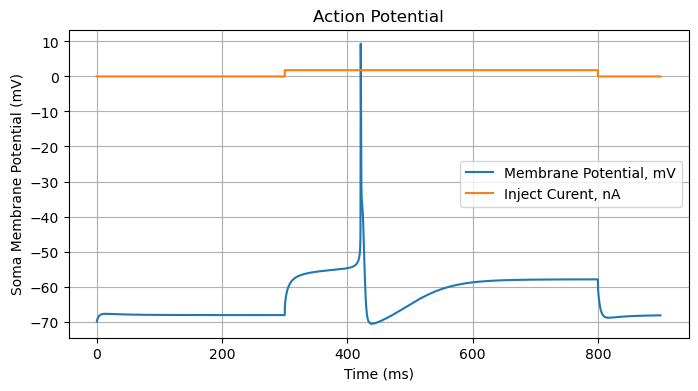

Resting membrane potential: -68.09 mV
Peak of the action potential: 14.97 mV
Action potential height: 83.06 mV
Latency to peak: 6.95 ms


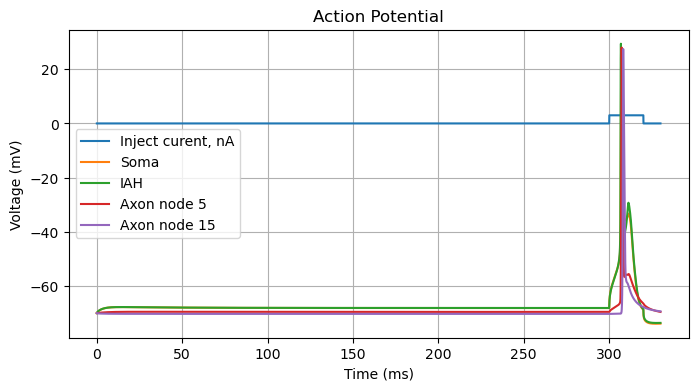

1.0

In [25]:
field_strength = 0.0008

i=0
for sec in EFsections:
    sec.e_extracellular = field_strength * x[i] 
    i = i+1

eextra =[]
for sec in EFsections:
    eextra.append(sec.e_extracellular)
#        print(f"Section {sec.name()}, e_extracellular: {sec.e_extracellular} mV")
print(min(eextra), max(eextra))
print(max(eextra)-min(eextra))

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance


steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin1 = delta_v / iclamp.amp  # In MΩ
gin1 = 1 / rin1  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin2 = delta_v / iclamp.amp  # In MΩ
gin2 = 1 / rin2  # µS

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance
steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin3 = delta_v / iclamp.amp  # In MΩ
gin3 = 1 / rin3  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.1

# Record voltage

t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin4 = delta_v / iclamp.amp  # In MΩ
gin4 = 1 / rin4  # µS

rin = (rin1 - rin2 +rin3 -rin4)/4
gin = (gin1- gin2 +gin3 -gin4)/4

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

print(f"Input Resistance final: {rin:.2f} MΩ")
print(f"Input Conductance final: {gin:.5f} µS")

# Start with a small current and gradually increase it
current_amplitudes = np.arange(1.78, 10.0,0.01)
rheobase = None

for amp in current_amplitudes:
    iclamp = h.IClamp(h.soma(0.5))
    iclamp.delay = 300  # Delay in ms before the stimulus starts
    iclamp.dur = 500   # Duration of the stimulus in ms (long enough to test rheobase)
    iclamp.amp = amp

    # Prepare to record time and voltage
    t_vec = h.Vector().record(h._ref_t)
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)
    i_vec = h.Vector().record(iclamp._ref_i)

    h.finitialize(-70)
    while h.t < 900:
        h.fadvance()

        # Convert recorded vectors to NumPy arrays
    v_d= np.array(v_vec)
    t_d= np.array(t_vec)
    i_d= np.array(i_vec)
    if np.max(v_d) > -10:
        rheobase = amp
        break

if rheobase is not None:
    print(f"Rheobase is approximately {rheobase:.2f} nA")
else:
    print("No spikes were elicited with the tested current range.")

plt.figure(figsize=(8, 4))
plt.plot(t_d, v_d, label="Membrane Potential, mV")
plt.plot(t_d, i_d, label="Inject Curent, nA")
plt.xlabel('Time (ms)')
plt.ylabel('Soma Membrane Potential (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

IC = h.IClamp(h.soma(0.5))
IC.delay = 300
IC.dur = 20
IC.amp = 3

# Prepare to record time and voltage
t_vec = h.Vector().record(h._ref_t)
v_soma = h.Vector().record(h.soma(0.5)._ref_v)
i_soma = h.Vector().record(IC._ref_i)
v_ah = h.Vector().record(h.IS(0.5)._ref_v)
v_ax5 = h.Vector().record(h.node[5](0.5)._ref_v)
v_ax15 = h.Vector().record(h.node[15](0.5)._ref_v)
h.finitialize(-70)
# Run the simulation
while h.t < 330:
    h.fadvance()

t = np.array(t_vec)
vs = np.array(v_soma)
i_s = np.array(i_soma)
vah = np.array(v_ah)
vax5 = np.array(v_ax5)
vax15 = np.array(v_ax15)

# Calculate the resting membrane potential (before stimulation)
v_rest = np.mean(vs[t < IC.delay])

# Identify the peak of the action potential
v_peak = np.max(vs)

# Calculate the AP height
ap_height = v_peak - v_rest

latency = 0
for i in range(len(vs)):
    if vs[i] == v_peak:
        latency = t[i] - IC.delay
        break

print(f"Resting membrane potential: {v_rest:.2f} mV")
print(f"Peak of the action potential: {v_peak:.2f} mV")
print(f"Action potential height: {ap_height:.2f} mV")
print(f"Latency to peak: {latency:.2f} ms")
plt.figure(figsize=(8, 4))
plt.plot(t, i_s, label="Inject curent, nA")
plt.plot(t, vs, label="Soma")
plt.plot(t, vah, label="IAH")
plt.plot(t,vax5, label="Axon node 5")
plt.plot(t,vax15, label = "Axon node 15")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

h.t = 0  # Reset time
IC.amp = 0
h.fcurrent()

In [26]:
field_strength = 0.0009

i=0
for sec in EFsections:
    sec.e_extracellular = field_strength * x[i] 
    i = i+1

eextra =[]
for sec in EFsections:
    eextra.append(sec.e_extracellular)
#        print(f"Section {sec.name()}, e_extracellular: {sec.e_extracellular} mV")
print(min(eextra), max(eextra))
print(max(eextra)-min(eextra))

-1.6635150003433226 3.5891743076869416
5.252689308030265


In [27]:
### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance


steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin1 = delta_v / iclamp.amp  # In MΩ
gin1 = 1 / rin1  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin2 = delta_v / iclamp.amp  # In MΩ
gin2 = 1 / rin2  # µS

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance
steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin3 = delta_v / iclamp.amp  # In MΩ
gin3 = 1 / rin3  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin4 = delta_v / iclamp.amp  # In MΩ
gin4 = 1 / rin4  # µS

rin = (rin1 - rin2 +rin3 -rin4)/4
gin = (gin1- gin2 +gin3 -gin4)/4

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

print(f"Input Resistance final: {rin:.2f} MΩ")
print(f"Input Conductance final: {gin:.5f} µS")

Input Resistance final: 20.03 MΩ
Input Conductance final: 0.05111 µS


Rheobase is approximately 1.79 nA


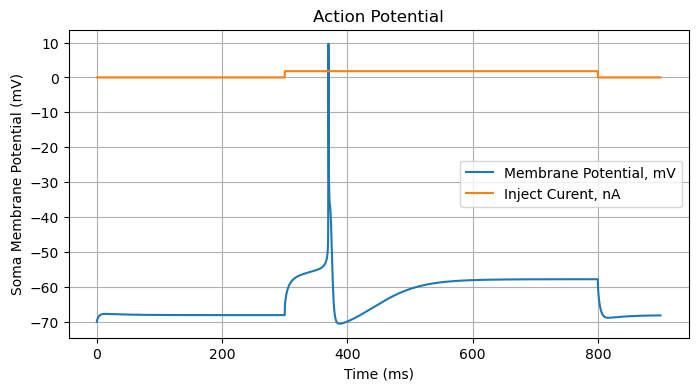

1.0

In [28]:
# Start with a small current and gradually increase it
current_amplitudes = np.arange(1.78, 10.0,0.01)
rheobase = None

for amp in current_amplitudes:
    iclamp = h.IClamp(h.soma(0.5))
    iclamp.delay = 300  # Delay in ms before the stimulus starts
    iclamp.dur = 500   # Duration of the stimulus in ms (long enough to test rheobase)
    iclamp.amp = amp

    # Prepare to record time and voltage
    t_vec = h.Vector().record(h._ref_t)
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)
    i_vec = h.Vector().record(iclamp._ref_i)

    h.finitialize(-70)
    while h.t < 900:
        h.fadvance()

        # Convert recorded vectors to NumPy arrays
    v_d= np.array(v_vec)
    t_d= np.array(t_vec)
    i_d= np.array(i_vec)
    if np.max(v_d) > -10:
        rheobase = amp
        break

if rheobase is not None:
    print(f"Rheobase is approximately {rheobase:.2f} nA")
else:
    print("No spikes were elicited with the tested current range.")

plt.figure(figsize=(8, 4))
plt.plot(t_d, v_d, label="Membrane Potential, mV")
plt.plot(t_d, i_d, label="Inject Curent, nA")
plt.xlabel('Time (ms)')
plt.ylabel('Soma Membrane Potential (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

Resting membrane potential: -68.05 mV
Peak of the action potential: 15.00 mV
Action potential height: 83.05 mV
Latency to peak: 6.90 ms


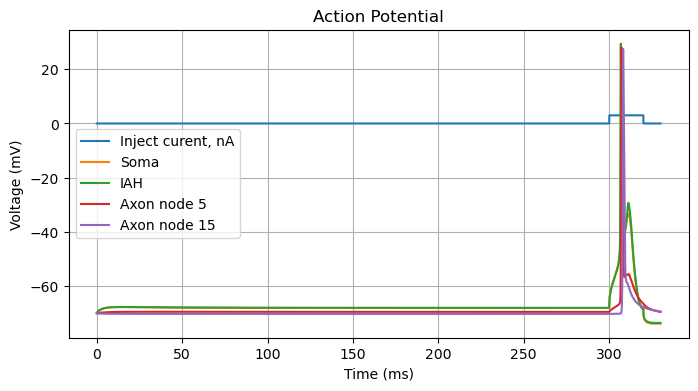

In [29]:
IC = h.IClamp(h.soma(0.5))
IC.delay = 300
IC.dur = 20
IC.amp = 3

# Prepare to record time and voltage
t_vec = h.Vector().record(h._ref_t)
v_soma = h.Vector().record(h.soma(0.5)._ref_v)
i_soma = h.Vector().record(IC._ref_i)
v_ah = h.Vector().record(h.IS(0.5)._ref_v)
v_ax5 = h.Vector().record(h.node[5](0.5)._ref_v)
v_ax15 = h.Vector().record(h.node[15](0.5)._ref_v)
h.finitialize(-70)
# Run the simulation
while h.t < 330:
    h.fadvance()

t = np.array(t_vec)
vs = np.array(v_soma)
i_s = np.array(i_soma)
vah = np.array(v_ah)
vax5 = np.array(v_ax5)
vax15 = np.array(v_ax15)

# Calculate the resting membrane potential (before stimulation)
v_rest = np.mean(vs[t < IC.delay])

# Identify the peak of the action potential
v_peak = np.max(vs)

# Calculate the AP height
ap_height = v_peak - v_rest

latency = 0
for i in range(len(vs)):
    if vs[i] == v_peak:
        latency = t[i] - IC.delay
        break

print(f"Resting membrane potential: {v_rest:.2f} mV")
print(f"Peak of the action potential: {v_peak:.2f} mV")
print(f"Action potential height: {ap_height:.2f} mV")
print(f"Latency to peak: {latency:.2f} ms")
plt.figure(figsize=(8, 4))
plt.plot(t, i_s, label="Inject curent, nA")
plt.plot(t, vs, label="Soma")
plt.plot(t, vah, label="IAH")
plt.plot(t,vax5, label="Axon node 5")
plt.plot(t,vax15, label = "Axon node 15")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

Calculate rheobase:

Calculate latency, action potential amplitude, resting membrane potential

Calculate input resistance and conductance:

In [33]:
h.t = 0  # Reset time
IC.amp = 0
h.fcurrent()

1.0

In [34]:
#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent() 

1.0

In [ ]:
field_strength = 0.01

i=0
for sec in EFsections:
    sec.e_extracellular = field_strength * x[i] 
    i = i+1

eextra =[]
for sec in EFsections:
    eextra.append(sec.e_extracellular)
#        print(f"Section {sec.name()}, e_extracellular: {sec.e_extracellular} mV")
print(min(eextra), max(eextra))
print(max(eextra)-min(eextra))

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance


steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin1 = delta_v / iclamp.amp  # In MΩ
gin1 = 1 / rin1  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin2 = delta_v / iclamp.amp  # In MΩ
gin2 = 1 / rin2  # µS

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance
steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin3 = delta_v / iclamp.amp  # In MΩ
gin3 = 1 / rin3  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.1

# Record voltage

t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin4 = delta_v / iclamp.amp  # In MΩ
gin4 = 1 / rin4  # µS

rin = (rin1 - rin2 +rin3 -rin4)/4
gin = (gin1- gin2 +gin3 -gin4)/4

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

print(f"Input Resistance final: {rin:.2f} MΩ")
print(f"Input Conductance final: {gin:.5f} µS")

# Start with a small current and gradually increase it
current_amplitudes = np.arange(1.78, 10.0,0.01)
rheobase = None

for amp in current_amplitudes:
    iclamp = h.IClamp(h.soma(0.5))
    iclamp.delay = 300  # Delay in ms before the stimulus starts
    iclamp.dur = 500   # Duration of the stimulus in ms (long enough to test rheobase)
    iclamp.amp = amp

    # Prepare to record time and voltage
    t_vec = h.Vector().record(h._ref_t)
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)
    i_vec = h.Vector().record(iclamp._ref_i)

    h.finitialize(-70)
    while h.t < 900:
        h.fadvance()

        # Convert recorded vectors to NumPy arrays
    v_d= np.array(v_vec)
    t_d= np.array(t_vec)
    i_d= np.array(i_vec)
    if np.max(v_d) > -10:
        rheobase = amp
        break

if rheobase is not None:
    print(f"Rheobase is approximately {rheobase:.2f} nA")
else:
    print("No spikes were elicited with the tested current range.")

plt.figure(figsize=(8, 4))
plt.plot(t_d, v_d, label="Membrane Potential, mV")
plt.plot(t_d, i_d, label="Inject Curent, nA")
plt.xlabel('Time (ms)')
plt.ylabel('Soma Membrane Potential (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

IC = h.IClamp(h.soma(0.5))
IC.delay = 300
IC.dur = 20
IC.amp = 3

# Prepare to record time and voltage
t_vec = h.Vector().record(h._ref_t)
v_soma = h.Vector().record(h.soma(0.5)._ref_v)
i_soma = h.Vector().record(IC._ref_i)
v_ah = h.Vector().record(h.IS(0.5)._ref_v)
v_ax5 = h.Vector().record(h.node[5](0.5)._ref_v)
v_ax15 = h.Vector().record(h.node[15](0.5)._ref_v)
h.finitialize(-70)
# Run the simulation
while h.t < 330:
    h.fadvance()

t = np.array(t_vec)
vs = np.array(v_soma)
i_s = np.array(i_soma)
vah = np.array(v_ah)
vax5 = np.array(v_ax5)
vax15 = np.array(v_ax15)

# Calculate the resting membrane potential (before stimulation)
v_rest = np.mean(vs[t < IC.delay])

# Identify the peak of the action potential
v_peak = np.max(vs)

# Calculate the AP height
ap_height = v_peak - v_rest

latency = 0
for i in range(len(vs)):
    if vs[i] == v_peak:
        latency = t[i] - IC.delay
        break

print(f"Resting membrane potential: {v_rest:.2f} mV")
print(f"Peak of the action potential: {v_peak:.2f} mV")
print(f"Action potential height: {ap_height:.2f} mV")
print(f"Latency to peak: {latency:.2f} ms")
plt.figure(figsize=(8, 4))
plt.plot(t, i_s, label="Inject curent, nA")
plt.plot(t, vs, label="Soma")
plt.plot(t, vah, label="IAH")
plt.plot(t,vax5, label="Axon node 5")
plt.plot(t,vax15, label = "Axon node 15")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

h.t = 0  # Reset time
IC.amp = 0
h.fcurrent()

-1.8483500003814697 3.987971452985491
5.836321453366961


In [ ]:
field_strength = 0.001

i=0
for sec in EFsections:
    sec.e_extracellular = field_strength * x[i] 
    i = i+1

eextra =[]
for sec in EFsections:
    eextra.append(sec.e_extracellular)
#        print(f"Section {sec.name()}, e_extracellular: {sec.e_extracellular} mV")
print(min(eextra), max(eextra))
print(max(eextra)-min(eextra))

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance


steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin1 = delta_v / iclamp.amp  # In MΩ
gin1 = 1 / rin1  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.09

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin2 = delta_v / iclamp.amp  # In MΩ
gin2 = 1 / rin2  # µS

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = 0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistance
steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin3 = delta_v / iclamp.amp  # In MΩ
gin3 = 1 / rin3  # µS


#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed


### Input resistance
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 300
iclamp.dur = 300
iclamp.amp = -0.1

# Record voltage

t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 700:
    h.fadvance()
# Calculate input resistanc

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin4 = delta_v / iclamp.amp  # In MΩ
gin4 = 1 / rin4  # µS

rin = (rin1 - rin2 +rin3 -rin4)/4
gin = (gin1- gin2 +gin3 -gin4)/4

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

print(f"Input Resistance final: {rin:.2f} MΩ")
print(f"Input Conductance final: {gin:.5f} µS")

# Start with a small current and gradually increase it
current_amplitudes = np.arange(1.78, 10.0,0.01)
rheobase = None

for amp in current_amplitudes:
    iclamp = h.IClamp(h.soma(0.5))
    iclamp.delay = 300  # Delay in ms before the stimulus starts
    iclamp.dur = 500   # Duration of the stimulus in ms (long enough to test rheobase)
    iclamp.amp = amp

    # Prepare to record time and voltage
    t_vec = h.Vector().record(h._ref_t)
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)
    i_vec = h.Vector().record(iclamp._ref_i)

    h.finitialize(-70)
    while h.t < 900:
        h.fadvance()

        # Convert recorded vectors to NumPy arrays
    v_d= np.array(v_vec)
    t_d= np.array(t_vec)
    i_d= np.array(i_vec)
    if np.max(v_d) > -10:
        rheobase = amp
        break

if rheobase is not None:
    print(f"Rheobase is approximately {rheobase:.2f} nA")
else:
    print("No spikes were elicited with the tested current range.")

plt.figure(figsize=(8, 4))
plt.plot(t_d, v_d, label="Membrane Potential, mV")
plt.plot(t_d, i_d, label="Inject Curent, nA")
plt.xlabel('Time (ms)')
plt.ylabel('Soma Membrane Potential (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed

IC = h.IClamp(h.soma(0.5))
IC.delay = 300
IC.dur = 20
IC.amp = 3

# Prepare to record time and voltage
t_vec = h.Vector().record(h._ref_t)
v_soma = h.Vector().record(h.soma(0.5)._ref_v)
i_soma = h.Vector().record(IC._ref_i)
v_ah = h.Vector().record(h.IS(0.5)._ref_v)
v_ax5 = h.Vector().record(h.node[5](0.5)._ref_v)
v_ax15 = h.Vector().record(h.node[15](0.5)._ref_v)
h.finitialize(-70)
# Run the simulation
while h.t < 330:
    h.fadvance()

t = np.array(t_vec)
vs = np.array(v_soma)
i_s = np.array(i_soma)
vah = np.array(v_ah)
vax5 = np.array(v_ax5)
vax15 = np.array(v_ax15)

# Calculate the resting membrane potential (before stimulation)
v_rest = np.mean(vs[t < IC.delay])

# Identify the peak of the action potential
v_peak = np.max(vs)

# Calculate the AP height
ap_height = v_peak - v_rest

latency = 0
for i in range(len(vs)):
    if vs[i] == v_peak:
        latency = t[i] - IC.delay
        break

print(f"Resting membrane potential: {v_rest:.2f} mV")
print(f"Peak of the action potential: {v_peak:.2f} mV")
print(f"Action potential height: {ap_height:.2f} mV")
print(f"Latency to peak: {latency:.2f} ms")
plt.figure(figsize=(8, 4))
plt.plot(t, i_s, label="Inject curent, nA")
plt.plot(t, vs, label="Soma")
plt.plot(t, vah, label="IAH")
plt.plot(t,vax5, label="Axon node 5")
plt.plot(t,vax15, label = "Axon node 15")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

h.t = 0  # Reset time
IC.amp = 0
h.fcurrent()